In [1]:
import pandas as pd

# Read the dataset from a CSV file
df = pd.read_csv('/content/ElectricCarData_Norm.csv')



In [2]:
# Exploratory data analysis
print("Data Summary:")

print(df.head())  # Display the first few rows of the dataset


Data Summary:
         Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   
3         BMW                            iX3    6.8 sec  180 km/h  360 km   
4       Honda                              e    9.5 sec  145 km/h  170 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   
3  206 Wh/km   560 km/h  Rapid charging possible  Rear Wheel Drive   
4  168 Wh/km   190 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      5548

In [3]:
print(df.info())  # Display the information about the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB
None


In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())  # Display descriptive statistics of numerical columns



Descriptive Statistics:
            Seats      PriceEuro
count  103.000000     103.000000
mean     4.883495   55811.563107
std      0.795834   34134.665280
min      2.000000   20129.000000
25%      5.000000   34429.500000
50%      5.000000   45000.000000
75%      5.000000   65000.000000
max      7.000000  215000.000000


In [5]:

# Segmenting by brand
brand_counts = df['Brand'].value_counts()
print("Vehicle Counts by Brand:")
print(brand_counts)



Vehicle Counts by Brand:
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64


In [6]:
# Segmenting by powertrain type
powertrain_counts = df['PowerTrain'].value_counts()
print("Vehicle Counts by Powertrain Type:")
print(powertrain_counts)



Vehicle Counts by Powertrain Type:
All Wheel Drive      41
Front Wheel Drive    37
Rear Wheel Drive     25
Name: PowerTrain, dtype: int64


In [7]:
# Segmenting by price range
price_ranges = pd.cut(df['PriceEuro'], bins=[0, 20000, 40000, 60000, 80000, 100000, float('inf')],
                      labels=['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '>100k'])
price_counts = price_ranges.value_counts()
print("Vehicle Counts by Price Range:")
print(price_counts)


Vehicle Counts by Price Range:
20k-40k     45
40k-60k     26
60k-80k     17
>100k       10
80k-100k     5
<20k         0
Name: PriceEuro, dtype: int64


In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Seats  PriceEuro
Seats      1.00000    0.02092
PriceEuro  0.02092    1.00000


<ipython-input-8-095ce353cbc1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


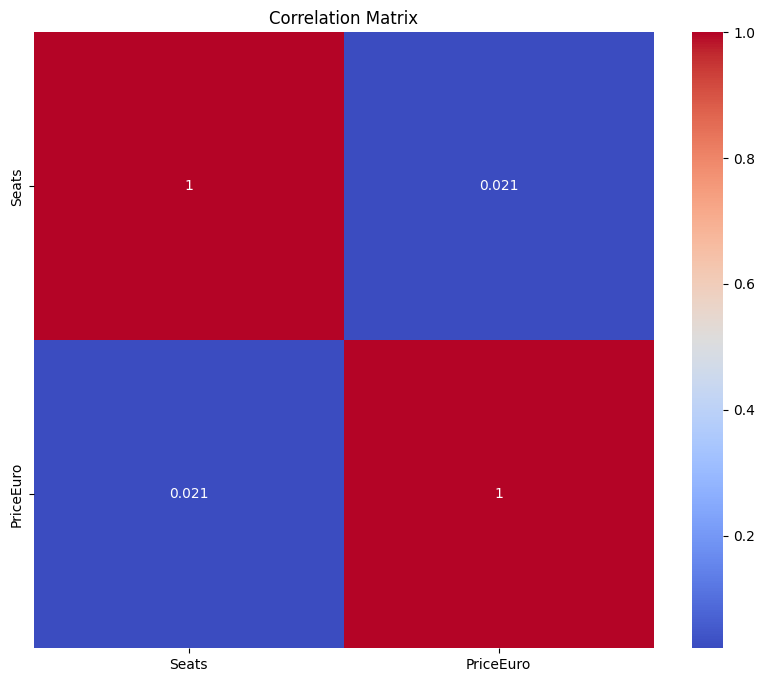

In [9]:
# Generate a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


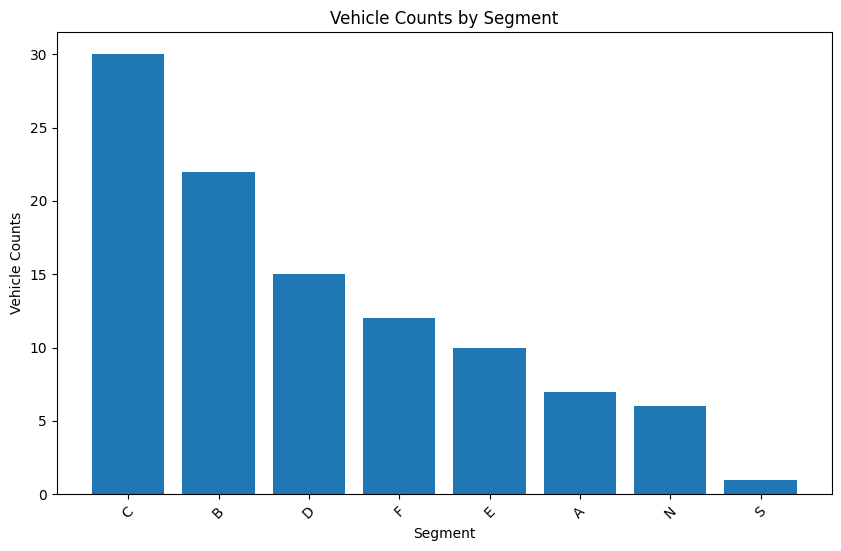

In [10]:
# Segment analysis by vehicle segment
segment_counts = df['Segment'].value_counts()
segment_average_price = df.groupby('Segment')['PriceEuro'].mean()

# Plotting segment analysis
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segment')
plt.ylabel('Vehicle Counts')
plt.title('Vehicle Counts by Segment')
plt.xticks(rotation=45)
plt.show()


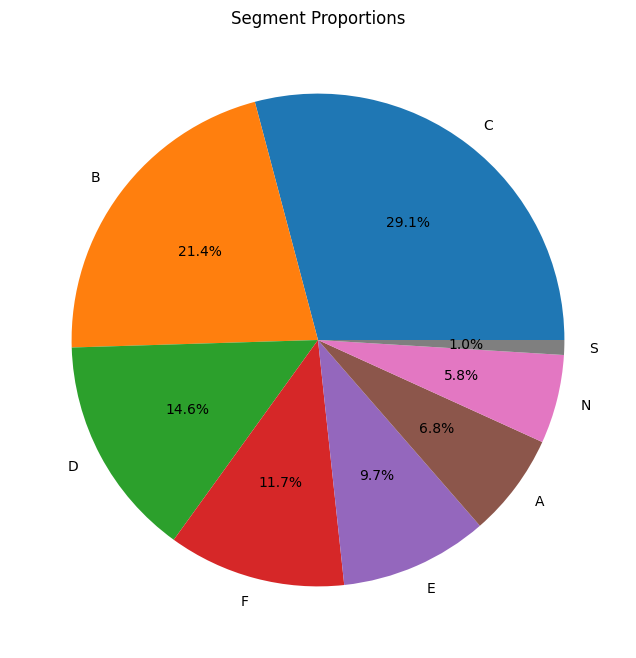

In [11]:
# Pie chart of segment proportions
segment_proportions = df['Segment'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(segment_proportions, labels=segment_proportions.index, autopct='%1.1f%%')
plt.title('Segment Proportions')
plt.show()


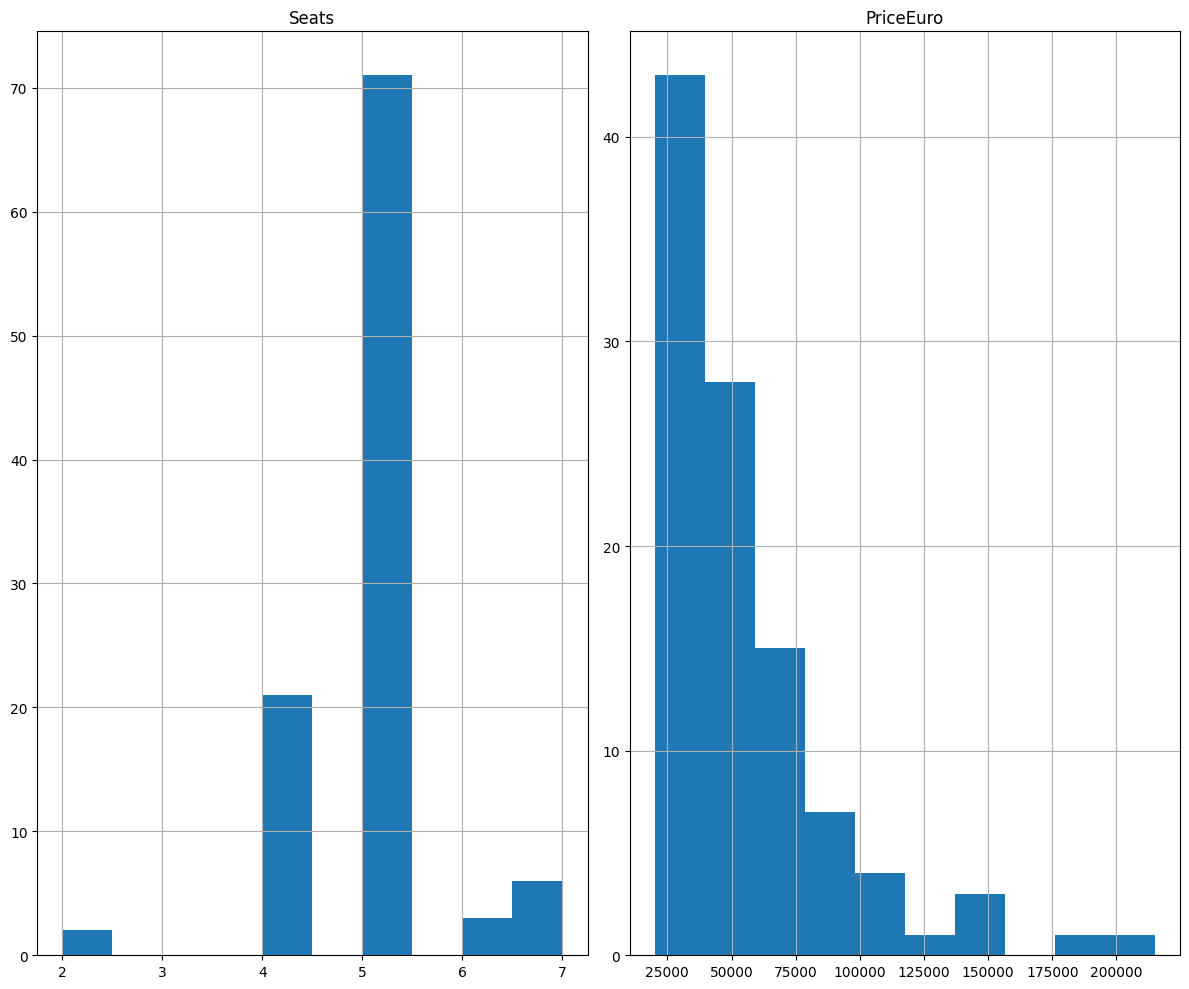

In [12]:
# Plotting histograms of numerical variables
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

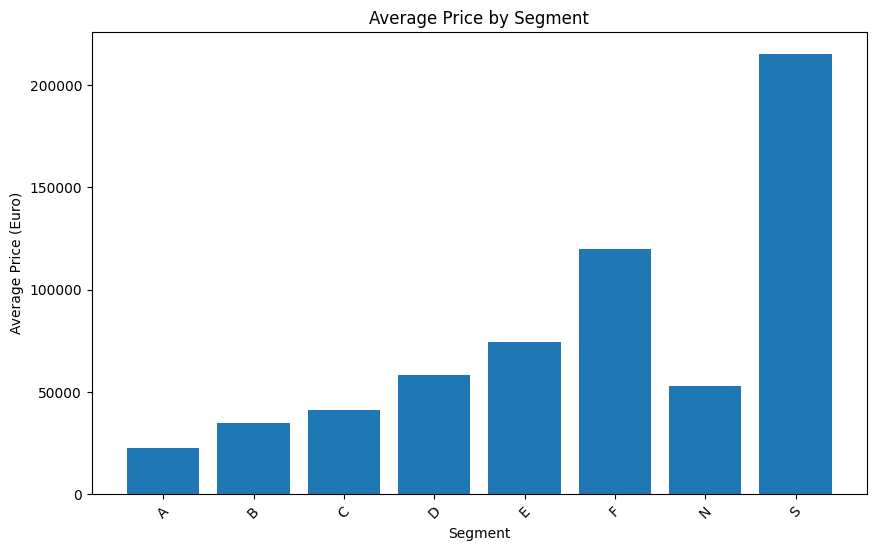

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(segment_average_price.index, segment_average_price.values)
plt.xlabel('Segment')
plt.ylabel('Average Price (Euro)')
plt.title('Average Price by Segment')
plt.xticks(rotation=45)
plt.show()

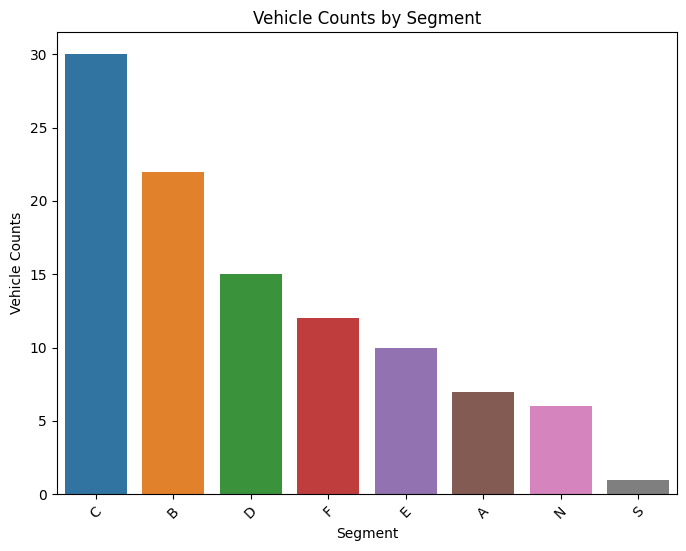

In [14]:
# Bar plot of vehicle counts by segment
segment_counts = df['Segment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Segment")
plt.ylabel("Vehicle Counts")
plt.title("Vehicle Counts by Segment")
plt.show()

In [15]:
# Convert 'Range' column to numeric
df['Range'] = pd.to_numeric(df['Range'], errors='coerce')

# Filtering based on specific criteria
filtered_df = df[(df['Range'] >= 300) & (df['PriceEuro'] <= 50000)]
print("Filtered Dataset:")
print(filtered_df.head())

Filtered Dataset:
Empty DataFrame
Columns: [Brand, Model, Accel, TopSpeed, Range, Efficiency, FastCharge, RapidCharge, PowerTrain, PlugType, BodyStyle, Segment, Seats, PriceEuro]
Index: []


In [16]:
# Subsetting the dataset
subset_columns = ['Brand', 'Model', 'Range', 'PriceEuro']
subset_df = df[subset_columns]
print("Subset of Dataset:")
print(subset_df.head())

Subset of Dataset:
         Brand                          Model  Range  PriceEuro
0       Tesla   Model 3 Long Range Dual Motor    NaN      55480
1  Volkswagen                       ID.3 Pure    NaN      30000
2    Polestar                               2    NaN      56440
3         BMW                            iX3     NaN      68040
4       Honda                              e     NaN      32997


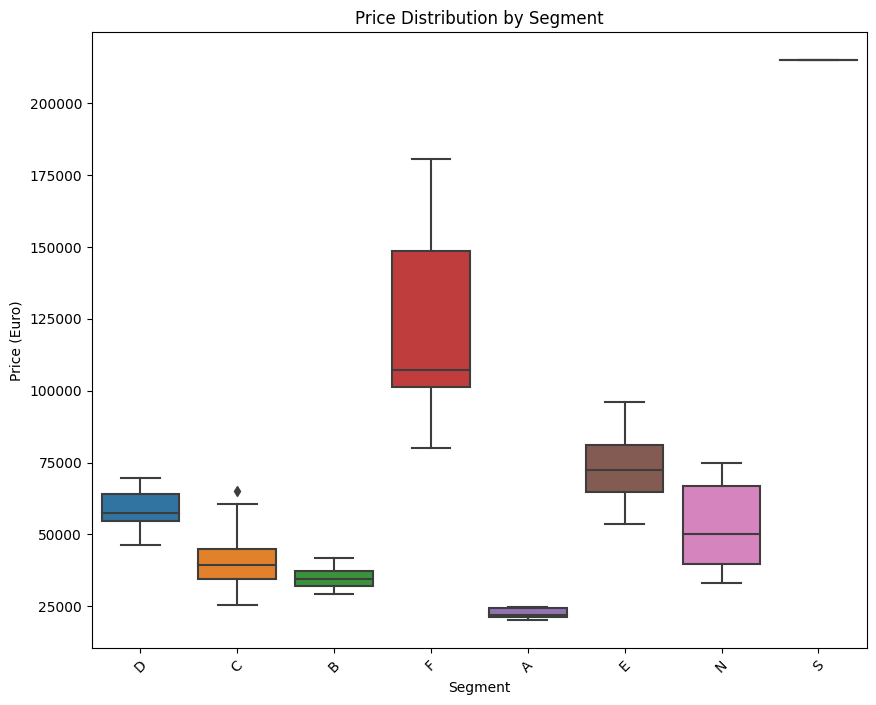

In [17]:
# Box plot of price by segment
plt.figure(figsize=(10, 8))
sns.boxplot(x='Segment', y='PriceEuro', data=df)
plt.xticks(rotation=45)
plt.xlabel("Segment")
plt.ylabel("Price (Euro)")
plt.title("Price Distribution by Segment")
plt.show()


In [18]:
# Grouping and calculating average range by powertrain type
avg_range_by_powertrain = df.groupby('PowerTrain')['Range'].mean()
print("Average Range by Powertrain Type:")
print(avg_range_by_powertrain)



Average Range by Powertrain Type:
PowerTrain
All Wheel Drive     NaN
Front Wheel Drive   NaN
Rear Wheel Drive    NaN
Name: Range, dtype: float64


In [19]:
# Grouping and calculating median price by brand and body style
median_price_by_brand_body = df.groupby(['Brand', 'BodyStyle'])['PriceEuro'].median()
print("Median Price by Brand and Body Style:")
print(median_price_by_brand_body)


Median Price by Brand and Body Style:
Brand        BodyStyle
Aiways       SUV           36057.0
Audi         SUV           74498.0
             Sedan        125000.0
BMW          Hatchback     39771.5
             SUV           68040.0
             Sedan         65000.0
Byton        SUV           62000.0
CUPRA        Hatchback     45000.0
Citroen      SUV           40000.0
DS           SUV           37422.0
Fiat         Cabrio        37900.0
             Hatchback     34900.0
Ford         SUV           54237.5
Honda        Hatchback     34459.0
Hyundai      Liftback      34459.0
             SUV           37383.0
Jaguar       SUV           75351.0
Kia          SUV           36837.0
Lexus        SUV           50000.0
Lightyear    Liftback     149000.0
Lucid        Sedan        105000.0
MG           SUV           30000.0
Mazda        SUV           32646.0
Mercedes     SPV           70631.0
             SUV           57242.0
Mini         Hatchback     31681.0
Nissan       Hatchback     50

In [20]:
# Filtering based on specific brands
specific_brands = ['Tesla', 'Nissan', 'BMW']
filtered_df = df[df['Brand'].isin(specific_brands)]
print("Filtered Dataset for Specific Brands:")
print(filtered_df.head())


Filtered Dataset for Specific Brands:
Empty DataFrame
Columns: [Brand, Model, Accel, TopSpeed, Range, Efficiency, FastCharge, RapidCharge, PowerTrain, PlugType, BodyStyle, Segment, Seats, PriceEuro]
Index: []


In [21]:
# Sorting the dataset by acceleration in descending order
sorted_df = df.sort_values(by='Accel', ascending=False)
print("Sorted Dataset by Acceleration:")
print(sorted_df.head())

Sorted Dataset by Acceleration:
       Brand                 Model    Accel  TopSpeed  Range Efficiency  \
96      Kia          e-Soul 39 kWh  9.9 sec  157 km/h    NaN  170 Wh/km   
41  Hyundai   Kona Electric 39 kWh  9.9 sec  155 km/h    NaN  154 Wh/km   
75      Kia          e-Niro 39 kWh  9.8 sec  155 km/h    NaN  167 Wh/km   
14  Hyundai         IONIQ Electric  9.7 sec  165 km/h    NaN  153 Wh/km   
58  Citroen                  e-C4   9.7 sec  150 km/h    NaN  180 Wh/km   

   FastCharge              RapidCharge         PowerTrain    PlugType  \
96   220 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   
41   210 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   
75   230 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   
14   210 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   
58   380 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   

   BodyStyle Segment  Seats  PriceEuro  
96       SUV       B      5      3313